In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import math

import density_contour

# plot inline figures
%matplotlib inline 

# to make saved pdf figures have real text, not outlines
matplotlib.rcParams['pdf.fonttype'] = 42 
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
############# THINGS TO MODIFY

# Read into pandas DataFrames
datapath="/Users/zanejobe/Dropbox/_CoRE/Rosie_Zane_working/Seaborn/"
filename="EnvironmentData_TR_Dist_Enviro"

filename2='PLDataLOGGED_TH_TR_Dist_OneGroup'

# specify export file name
figname="Enviro_TR_Dist_Data"


In [3]:
# import data
df = pd.read_csv(datapath + filename + '.txt', header=None, engine='python', sep='  ', names=['tr', 'dist', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space

pl = pd.read_csv(datapath + filename2 + '.txt', header=None, engine='python', sep='  ', names=['th', 'tr', 'dist', 'group']) # throws a warning because the file is delimited by multiple spaces, and python expects only 1 space

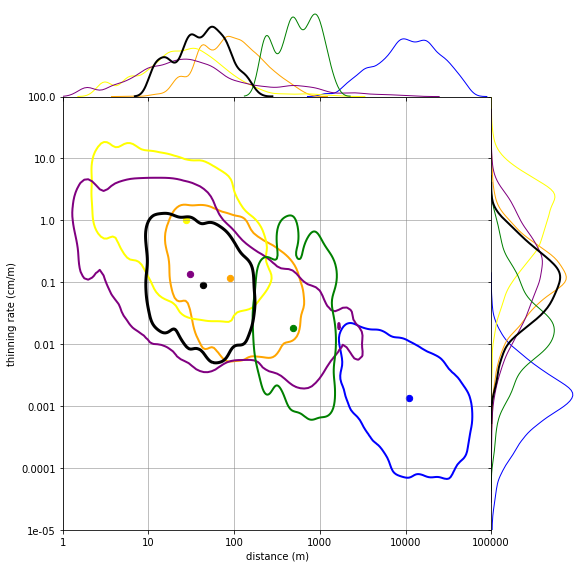

In [4]:
xlab="distance (m)"
ylab="thinning rate (cm/m)"

g = sns.JointGrid("dist", "tr", df, size=8, space=0)

colors = ["blue", "orange" , "yellow", "purple", "green"]
ncolor = 0

for group, values in df.groupby("group"):
    # plot the marginal KDEs for x and y
    sns.kdeplot(values["dist"], ax=g.ax_marg_x, color=colors[ncolor], linewidth=1, shade=False, legend=False)
    sns.kdeplot(values["tr"], ax=g.ax_marg_y, color=colors[ncolor], linewidth=1, vertical=True, shade=False, legend=False)

    # plot the median values
    g.ax_joint.scatter(values["dist"].median(),values["tr"].median(), color=colors[ncolor], s=40)
    
    # now plot the 2D contour map
    for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
        density_contour.bivar_kde_contour(values["dist"], values["tr"], frac=level, ax=g.ax_joint, color=colors[ncolor], alpha=1, linewidths=2)
    
    ncolor+=1
    
# NOW PLOT POINT LOMA ON TOP
sns.kdeplot(pl.dist, ax=g.ax_marg_x, color='black', linewidth=2, shade=False, legend=False)
sns.kdeplot(pl.tr, ax=g.ax_marg_y, color='black', linewidth=2, vertical=True, shade=False, legend=False)

# plot the median values
g.ax_joint.scatter(pl.dist.median(),pl.tr.median(), color='black', s=40)
    
# now plot the 2D contour map
for level in np.array([0.9]): # or could say np.linspace(0.1, 0.9, 9)
     density_contour.bivar_kde_contour(pl.dist, pl.tr, frac=level, ax=g.ax_joint, color='black', alpha=1, linewidths=3)

xlim=[0,5]
ylim=[-7,0]
        
g.ax_joint.set_xlim(xlim)
g.ax_joint.set_ylim(ylim)
g.ax_joint.grid(color='grey', linestyle='-', linewidth=0.5)  
g.ax_joint.set_xlabel(xlab) 
g.ax_joint.set_ylabel(ylab) 

xticklabel=np.arange(xlim[0],xlim[1]+1,1)
g.ax_joint.set_xticklabels(np.power(10,xticklabel)) 

yticklabel=np.arange(ylim[0]+2,ylim[1]+3,1) # add 2 (i.e., 100 in log space) to each to convert m/m to cm/m
yticklabel=yticklabel.astype(float)
g.ax_joint.set_yticklabels(np.power(10,yticklabel)) 

plt.savefig(figname + ".pdf", transparent=True)